<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/K-Means-Clustering/blob/main/Clustering_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing the Dataset

In [ ]:
dataset=pd.read_csv('CC_GENERAL.csv')
dataset=dataset.drop(columns=['CUST_ID'])
X=dataset.iloc[:,:].values

In [ ]:
print(dataset.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

# Checking for missing Values

In [ ]:
column_X=dataset.columns
column_index=[]

for cols in column_X:
  missing_values=dataset[cols].isnull().sum()
  if missing_values>0:
    column_index.append({'column ':cols,
                         'index':dataset.columns.get_loc(cols)})

col_ind_len=len(column_index)

for i in column_index:
  print(i)


{'column ': 'CREDIT_LIMIT', 'index': 12}
{'column ': 'MINIMUM_PAYMENTS', 'index': 14}


# Handling missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,[12]]=imputer.fit_transform(X[:,[12]])
X[:,[14]]=imputer.fit_transform(X[:,[14]])

# Applying Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
print(X)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


# Applying the Elbow method with K Means++ to see the ideal number of clusters

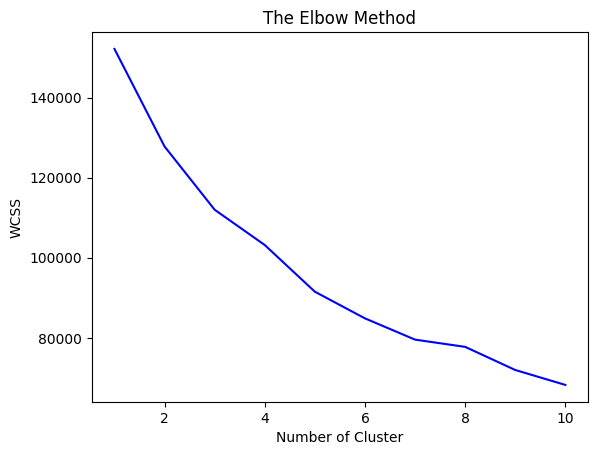

In [ ]:

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='blue')
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

# Training & prediction with 5 clusters

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [ ]:

dataset['Cluster']=y_kmeans
print(dataset.groupby('Cluster').mean())

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         930.357741           0.962886  1299.705338        633.167216   
1        4901.241786           0.967162   551.983377        347.758605   
2        3588.990384           0.986874  7815.732886       5203.519089   
3        1524.610238           0.965721   255.629606        206.571304   
4         111.260364           0.381755   335.222822        199.440295   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    666.735496    226.754889             0.897121   
1                    204.327573   4982.037485             0.313364   
2                   2613.732785    661.788641             0.944730   
3                     49.407619    792.368773             0.159106   
4                    136.001245    325.747598             0.2

# Visualising our result

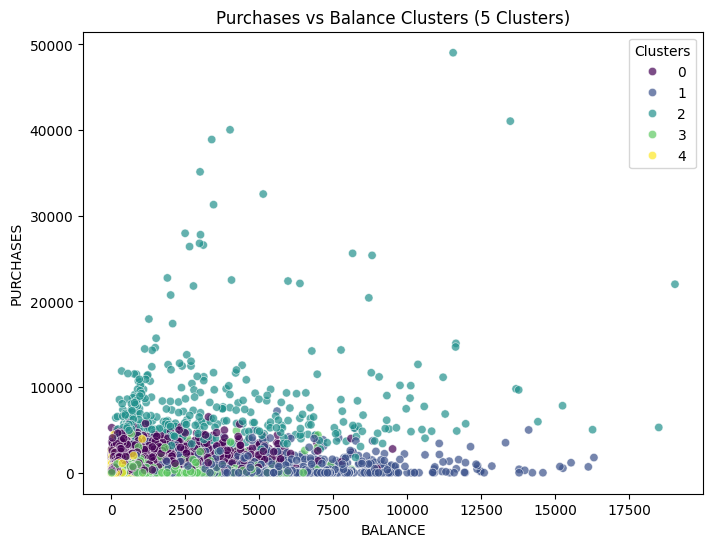

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=dataset,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)

plt.title("Purchases vs Balance Clusters (5 Clusters)")
plt.legend(title='Clusters')
plt.show()

In [ ]:
kmeans_2=KMeans(n_clusters=4,init='k-means++')
y_kmeans_2=kmeans_2.fit_predict(X)

In [ ]:
print(y_kmeans_2)

[1 2 3 ... 3 1 1]


In [ ]:
dataset['Cluster2']=y_kmeans_2
print(dataset.groupby('Cluster2').mean())

              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster2                                                                  
0         3556.148177           0.986911  7680.432073       5099.738293   
1         1001.528209           0.788583   270.731977        209.468426   
2         4579.634667           0.968490   492.404081        313.228153   
3          897.456372           0.935846  1238.779285        595.851281   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster2                                                              
0                    2582.157195    686.680975             0.946548   
1                      61.530909    588.078522             0.171857   
2                     179.259744   4480.714056             0.284191   
3                     643.203117    211.260815             0.885991   

          ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster2                                        

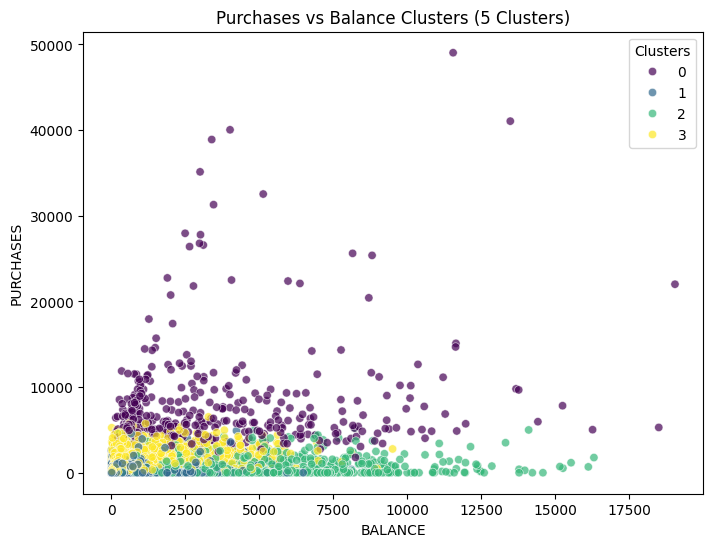

In [ ]:
import seaborn as sns
dataset=dataset.drop(columns='Cluster')
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=dataset,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster2',
    palette='viridis',
    alpha=0.7
)

plt.title("Purchases vs Balance Clusters (5 Clusters)")
plt.legend(title='Clusters')
plt.show()